# Project: Predicting no shows 
Author: Shabs Rajasekharan. Report created as part fo the Udacity Nanodegree program. 
Dataset used: No-Show Appointments dataset.

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. Its original source can be found here: https://www.kaggle.com/joniarroba/noshowappointments

Although there is ample contextual information publicly available about the larger program from which this dataset was pulled (see context below), it is not clear what came first: the question or the data? It is very likely that it was the data. This is highlighted here because the main question (originally posted on Kaggle) may have been planted without considering the data collected to answer it. 

## Main research question: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


## Context 

The observations in the dataset are part of the Bolsa Família social welfare program of the Brazilian government. Bolsa Família provides financial aid (income cash transfer) to poor Brazilian families, unders specific conditions. The program attempts to both reduce short-term poverty by direct cash transfers and fight long-term poverty by increasing human capital among the poor through conditional cash transfers. About 12 million Brazilian families receive funds from Bolsa Família (in 2011, 26% of the population were covered) and it has been mentioned as one factor contributing to the reduction of poverty in Brazil, which fell 27.7% during the first term in the Luiz Inácio Lula da Silva administration (2003 - 2011). 

Further information on the Bolsa Familia program can be found here: https://factsreports.revues.org/1560


## About the data file and version

A note is made here about the version of this data. It has been manipulated and pre-processed several times by the public on Kaggle. This analysis is based on version 6. 

In [2]:
# Packages I plan to use
% matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

#I want to display all the code in a shell, not just the last output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<a id='wrangling'></a>
## Data structure and general properties

In [3]:
# Load the data
df = pd.read_csv("data/KaggleV2-May-2016.csv")
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [3]:
#lets have a look at the first and last lines of data and a random sample
df.head()
df.tail()
df.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
85010,8.377838e+13,5743569,F,2016-05-30T09:09:06Z,2016-06-01T00:00:00Z,12,BARRO VERMELHO,0,0,0,0,0,0,No
74616,6.579565e+13,5706809,F,2016-05-17T08:52:03Z,2016-05-19T00:00:00Z,63,JARDIM CAMBURI,0,0,0,0,0,0,No
25590,4.144474e+11,5644597,F,2016-05-02T08:52:09Z,2016-05-10T00:00:00Z,3,REPÚBLICA,0,0,0,0,0,1,No
3966,1.436627e+11,5561975,F,2016-04-08T11:48:11Z,2016-05-04T00:00:00Z,63,MARIA ORTIZ,0,0,0,0,0,1,No
84019,7.859988e+12,5705407,F,2016-05-17T07:10:20Z,2016-05-17T00:00:00Z,79,TABUAZEIRO,0,1,1,0,0,0,No
105218,3.897142e+14,5740691,F,2016-05-25T15:52:04Z,2016-06-01T00:00:00Z,67,MONTE BELO,0,0,0,0,0,1,No
36699,8.836374e+13,5626175,F,2016-04-27T07:56:19Z,2016-05-03T00:00:00Z,32,RESISTÊNCIA,0,0,0,0,0,1,No
86921,5.471942e+14,5724295,F,2016-05-20T09:19:10Z,2016-06-01T00:00:00Z,8,PRAIA DO SUÁ,1,0,0,0,0,1,No
76042,5.431535e+12,5637850,F,2016-04-29T07:26:44Z,2016-05-02T00:00:00Z,25,SÃO PEDRO,0,0,0,0,0,1,No
110213,7.246521e+12,5627640,F,2016-04-27T09:44:00Z,2016-06-02T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No


From public descriptions of the data, we know that 
‘ScheduledDay’ tells us on what day the patient set up their appointment. 
‘Neighborhood’ indicates the location of the hospital. 
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

The last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [6]:
# Are there any missing or NaN values? 
df.describe()
df.info()
df['PatientId'].count()
df.isnull().sum()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


110527

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

According to the following blocks of results above, there are no NaN or missing values. Here the count value is the same as that in the shape output, meanign there are no missing values and also there are no NaN values according to the isnull function output.

### Data Cleaning: data types, outliers and other anomalies

In [7]:
# In the previous section, it was clear that there may be some strings that should be in other formats
# let's check out the data types once more
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
# Patient ID would be better as a number rather than an exponential. 
# This will not affect analysis but it will make reading the data easier
df['PatientId'] = df['PatientId'].astype('int64')
df['PatientId'].dtype
df.head()

dtype('int64')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# change the data types of ScheduledDay and AppointmentDay to datetime.
from datetime import datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [10]:
# Something to note: max age of 115, min age of -1? See output of df.describe above
# I wonder how many more centenarians there are and whether this is an outlier...well, 
# the negative person certainly is...unless they considered a fetus. let's do some queries
df.query('Age >= 100') 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,976294799775439,5651757,F,2016-05-03 09:14:53,2016-05-03,102,CONQUISTA,0,0,0,0,0,0,No
63912,31963211613981,5700278,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,31963211613981,5700279,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,31963211613981,5562812,F,2016-04-08 14:29:17,2016-05-16,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,31963211613981,5744037,F,2016-05-30 09:44:51,2016-05-30,115,ANDORINHAS,0,0,0,0,1,0,No
79270,9739429797896,5747809,M,2016-05-30 16:21:56,2016-05-31,100,TABUAZEIRO,0,0,0,0,1,0,No
79272,9739429797896,5747808,M,2016-05-30 16:21:56,2016-05-31,100,TABUAZEIRO,0,0,0,0,1,0,No
90372,234283596548,5751563,F,2016-05-31 10:19:49,2016-06-02,102,MARIA ORTIZ,0,0,0,0,0,0,No
92084,55783129426615,5670914,F,2016-05-06 14:55:36,2016-06-03,100,ANTÔNIO HONÓRIO,0,0,0,0,0,1,No
97666,748234579244724,5717451,F,2016-05-19 07:57:56,2016-06-03,115,SÃO JOSÉ,0,1,0,0,0,1,No


There are 7 people over the age of 100, five of whom are 115. These could be duplicates because the 100 
and 102 year olds may indeed be correct. The author has decided to leave the centenarians as correct 
but have a closer look at the 155 yr old. On closer inspection, it looks as though there are duplicates in the dataset. For example, row 63912 and 63915 look like duplicates created at the point of registration (probably a call center error?) Two appointments have been created for the same person: the patientID AND ScheduledDay are the same. The Appointment ID is different. 

In [11]:
# How many duplicates in total?
sum(df.duplicated(subset = ['PatientId', 'ScheduledDay']))
# Have a look at all the duplicates with their originals.
df.loc[df.duplicated(subset=['PatientId', 'ScheduledDay'], keep = False), :];

A look through the data suggests that entries can be removed based on appointmentID, which in each case is different. On the other hand, in several duplicate observations, the SMS_recieved is distinct. In some cases, a text was recieved, in some they weren't. It looks almost as if the duplication was created as a response to the text message. 
However, its not the case for all of them. There are duplications were neither observation has recorded the SMS being recieved. And a quick glance shows that not all the SMS being recieved has had an impact on no-show. In rows 110417 and 110420, although the patient recieved an SMS there was a no show while she showed up forthe one with the error. 

Also, it is not clear to the author why row 367 has been filtered above. 

In [12]:
# How about the negative age?
df.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


The author has decided to leave the negative age in as a possible error only in age and not in the observation data itself. 

In [13]:
# Sort the dataset first (so that SMS comes last) then drop the first. This assumes that the first recodring
# of the patient registration is false. 
df.sort_values('PatientId', inplace = True)
df.drop_duplicates(subset= ['PatientId', 'ScheduledDay'], keep='last', inplace = True)
df.shape

(109193, 14)

In [14]:
# Store the data so it can be used later without having to go through all the manipulations again
df.to_csv('data/noShow_clean.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

The main question to be answered in the no-show data set is: "What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?" As a predictive model will not be created here at this time, the research question is divided into the preliminary analysis required before creating a predictive model. 

### Research question 1: What factors are highly correlated to outcome?

In [15]:
# read in the sorted data and make sure its all ok
nosho = pd.read_csv("data/noShow_clean.csv")
# check to see it's all ok
nosho.shape
nosho.head()
nosho.dtypes

(109193, 14)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,39217,5751990,F,2016-05-31 10:56:41,2016-06-03 00:00:00,44,PRAIA DO SUÁ,0,0,0,0,0,0,No
1,43741,5760144,M,2016-06-01 14:22:58,2016-06-01 00:00:00,39,MARIA ORTIZ,0,0,1,0,0,0,No
2,93779,5712759,F,2016-05-18 09:12:29,2016-05-18 00:00:00,33,CENTRO,0,0,0,0,0,0,No
3,141724,5637648,M,2016-04-29 07:13:36,2016-05-02 00:00:00,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No
4,537615,5637728,F,2016-04-29 07:19:57,2016-05-06 00:00:00,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No


PatientId          int64
AppointmentID      int64
Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No-show           object
dtype: object

In [16]:
# looks like the data types from before weren't preserved. 
nosho['AppointmentDay'] = pd.to_datetime(nosho['AppointmentDay'])
nosho['ScheduledDay'] = pd.to_datetime(nosho['ScheduledDay'])

In [44]:
# To do any correlations the categorical variables must first be changed to dummies. 
# This is not always recommended when attempting predictive analysis but as this is just to look at correlations,
# it shouldn't matter too much
nosho = nosho.join(pd.get_dummies(nosho['Gender']))
nosho = nosho.join(pd.get_dummies(nosho['No-show']))
nosho.head(10)
# note that now the dataset contains four extra columns. No-show has been split into Yes (failed to attend) 
# and No (attended), and Gender into M and F. 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,F,M,No,Yes
0,39217,5751990,F,2016-05-31 10:56:41,2016-06-03,44,PRAIA DO SUÁ,0,0,0,0,0,0,No,1,0,1,0
1,43741,5760144,M,2016-06-01 14:22:58,2016-06-01,39,MARIA ORTIZ,0,0,1,0,0,0,No,0,1,1,0
2,93779,5712759,F,2016-05-18 09:12:29,2016-05-18,33,CENTRO,0,0,0,0,0,0,No,1,0,1,0
3,141724,5637648,M,2016-04-29 07:13:36,2016-05-02,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No,0,1,1,0
4,537615,5637728,F,2016-04-29 07:19:57,2016-05-06,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No,1,0,1,0
5,5628261,5680449,M,2016-05-10 11:58:18,2016-05-13,13,PARQUE MOSCOSO,0,0,0,0,0,0,Yes,0,1,0,1
6,11831856,5718578,M,2016-05-19 09:42:07,2016-05-19,16,SANTO ANTÔNIO,0,0,0,0,0,0,No,0,1,1,0
7,22638656,5715081,F,2016-05-18 13:37:12,2016-06-08,23,INHANGUETÁ,0,0,0,0,0,1,No,1,0,1,0
8,22638656,5580835,F,2016-04-14 07:23:30,2016-05-03,22,INHANGUETÁ,0,0,0,0,0,1,No,1,0,1,0
9,52168938,5607220,F,2016-04-20 11:22:15,2016-05-17,28,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0,1,0


Before doing any correlations, it is important to see how the outcome itself is distributed. In particular, bias needs to be ascertained in the dataset.

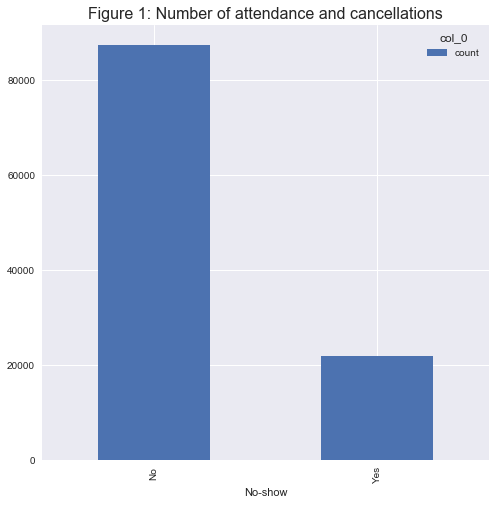

In [72]:
# Let's have a look at distribution frequencies using crosstab to tally counts
# first how many no-shows and show's are there?
fig = plt.figure();
nosho_table = pd.crosstab(index=nosho["No-show"], columns="count")
nosho_table
nosho_table.plot(kind="bar",figsize=(8,8));
plt.title('Figure 1: Number of attendance and cancellations', fontsize = 16);
txt = "Figure 1: This figure shows the total numbers of attendance and cancellations across the dataset";
fig.text(.005, .01, txt, ha='center', fontsize = 14, wrap = True);

Figure 1 shows the total numbers of attendance and cancellations across the dataset. From this it can be noted that there will be a bias in this dataset and that it will impact any correlations and regressions attempted with the data. 

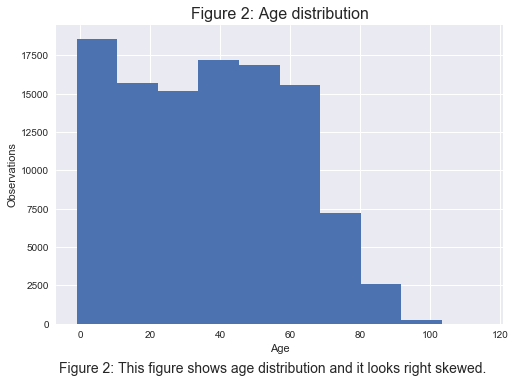

In [73]:
# Let's have a look at some quick visual histograms. 
# Most of the variables here are categorical but a histogram of age can be plotted
fig = plt.figure();
nosho['Age'].hist();
plt.ylabel('Observations');
plt.xlabel('Age');
plt.title('Figure 2: Age distribution', fontsize = 16);
txt = "Figure 2: This figure shows age distribution and it looks right skewed.";
fig.text(.5, .001, txt, ha='center', fontsize = 14, wrap = True);

The Age distribution shown in the figure above is right skewed (positively skewed) and the mean is probably to the right of the median. This means that the sample sizes are larger for ages 0-18 and 35-50, than for the older ages. This needs to be taken into account before drawing conclusions on correlation  

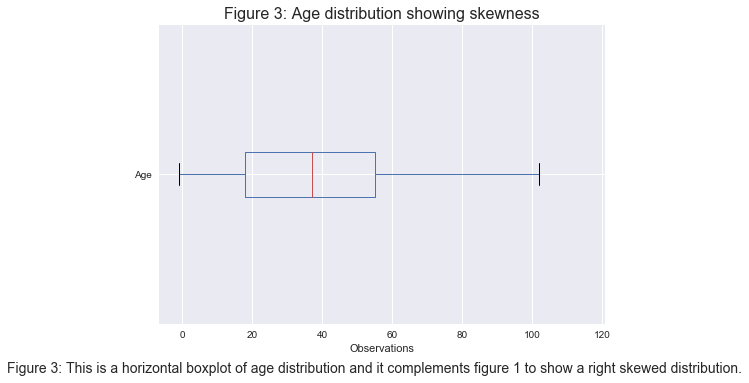

In [76]:
# verifing distribution on a boxplot: positive skewness
fig = plt.figure();
nosho.boxplot('Age', vert = False);
plt.title('Figure 3: Age distribution showing skewness', fontsize = 16);
plt.xlabel('Observations')
txt = "Figure 3: This is a horizontal boxplot of age distribution and it complements figure 1 to show a right skewed distribution.";
fig.text(.5, .001, txt, ha='center', fontsize = 14, wrap = True);

Figure 3 complements figure 2. It shows the right skewed or positive skewness of the age, where the mean is very likely to the right of the median. This means that the sample sizes are much larger in the younger ages rather than in the older ones and needs ot be taken into account before drawing conculsions on correlations

In [59]:
#correlation between age and attendance
nosho[['Age','Yes', 'No']].corr()

,Age,Yes,No
Age,1.000000,-0.060768,0.060768
Yes,-0.060768,1.000000,-1.000000
No,0.060768,-1.000000,1.000000


The table above shows that there is little correlation between age, attendance and non-attendance. The p-coefficient when using Pearson Correlation should be around 0.7 or higher to be considered significant* (See note in conclusion on using this statistical method with categorical date)

In [48]:
# It may be more interesting to cut the ages and see if there is any correlation
bins = [0, 18, 30, 45, 55, 65, 75, 100]
age_groups = ['0-18', '18-30', '30-45', '45-55', '55-65', '65-75', '75+']
nosho['age_groups'] = pd.cut(nosho['Age'], bins, labels=age_groups)

In [80]:
# let's have a quick look at counts and head, to check that everything binned ok
pd.value_counts(nosho['age_groups'])
nosho.head()

0-18     25040
30-45    21601
18-30    16536
45-55    15237
55-65    14050
65-75     7851
75+       5347
Name: age_groups, dtype: int64

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,F,M,No,Yes,age_groups
0,39217,5751990,F,2016-05-31 10:56:41,2016-06-03,44,PRAIA DO SUÁ,0,0,0,0,0,0,No,1,0,1,0,30-45
1,43741,5760144,M,2016-06-01 14:22:58,2016-06-01,39,MARIA ORTIZ,0,0,1,0,0,0,No,0,1,1,0,30-45
2,93779,5712759,F,2016-05-18 09:12:29,2016-05-18,33,CENTRO,0,0,0,0,0,0,No,1,0,1,0,30-45
3,141724,5637648,M,2016-04-29 07:13:36,2016-05-02,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No,0,1,1,0,0-18
4,537615,5637728,F,2016-04-29 07:19:57,2016-05-06,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No,1,0,1,0,0-18


,No,Yes
age_groups,,
0-18,19433.0,5607.0
18-30,12473.0,4063.0
30-45,17036.0,4565.0
45-55,12463.0,2774.0
55-65,11860.0,2190.0
65-75,6670.0,1181.0
75+,4497.0,850.0


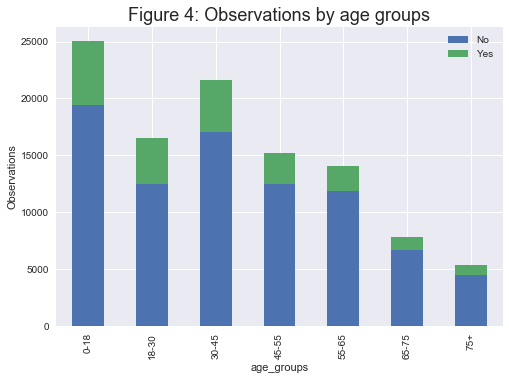

In [75]:
# now let's group the data within ages and see if any conclusions can be drawn
fig = plt.figure();
nosho_ages = nosho.groupby('age_groups')['No','Yes'].sum();
nosho_ages[['No','Yes']].plot(kind='bar',stacked=True);
plt.ylabel('Observations');
plt.title('Figure 4: Observations by age groups', fontsize = 18);
txt = "Figure 4: This is a stacked bar graph showing distribution of age groups.";
fig.text(.1, .1, txt, ha='center', fontsize = 14, wrap = True);
nosho_ages

Figure 4 is a stacked bar graph that shows age distribution according to groups. It also shows the attendance and no-attendance figures. It could be concluded from the graph that the younger age groups are more likely to cancel attendanc ebut it must be noted that the sample size is much larger in these groups and distribution skewed as was seen in figures 1 and 2. The table above the figure displays the counts in each age group and supports the remark on sample sizes

It will be interesting to see if gender has an impact in attendance.

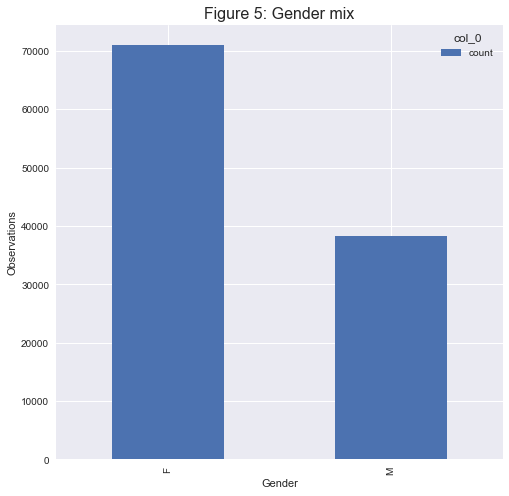

In [79]:
# Find the total counts of male and female
fig = plt.figure();
nosho_mf = pd.crosstab(index=nosho["Gender"], columns="count")
nosho_mf.plot(kind="bar",figsize=(8,8));
plt.title('Figure 5: Gender mix', fontsize = 16);
txt = "Figure 5: This is a bar graph showing total gender mix";
fig.text(.1, .1, txt, ha='center', fontsize = 14, wrap = True);
plt.ylabel('Observations');

Figure 5 is a bar graph showing total gender mix. Again, it is important to see here that the sample size for females is greater than males and this needs to be taken into account when drawing any conclusions on corrleations

In [60]:
# gender, age and attendance
nosho[['Age','F','M','Yes']].corr()

,Age,F,M,Yes
Age,1.000000,0.107164,-0.107164,-0.060768
F,0.107164,1.000000,-1.000000,0.004807
M,-0.107164,-1.000000,1.000000,-0.004807
Yes,-0.060768,0.004807,-0.004807,1.000000


In the table above, it can be concluded that there is no correlation between gender and non-attendance. On the other hand, it must be noted that there is a larger sample size of females in the dataset, so any kind of conclusion drawn comes with a bias

In [65]:
# correlation between SMS reminders and attendance
nosho[['SMS_received','Yes']].corr()

,SMS_received,Yes
SMS_received,1.000000,0.128601
Yes,0.128601,1.000000


The table shows that there is no correlation between receiving a text and attendance which is surprising indeed: as the author expected this to show some correlation. In some countries (eg. the UK), text reminders have worked to increase attendance. However, in other countries such as the Netherlands, the same experiment failed to make any difference to attendance rates. 

In [66]:
# Is chronic illness correlated to no-show? 
nosho[['Hipertension','Diabetes','Alcoholism','Handcap','Yes']].corr()

,Hipertension,Diabetes,Alcoholism,Handcap,Yes
Hipertension,1.000000,0.432652,0.087614,0.080345,-0.035752
Diabetes,0.432652,1.000000,0.018704,0.058284,-0.014210
Alcoholism,0.087614,0.018704,1.000000,0.002339,-0.000644
Handcap,0.080345,0.058284,0.002339,1.000000,-0.006024
Yes,-0.035752,-0.014210,-0.000644,-0.006024,1.000000


Admittedly, the above table is included for thoroughness. The author did not expect to see any correlations here. Chronic illness may affect the speed in recieving an appointment but it is unlikely to affect attendance rates.

In [67]:
# Does being in the Bolsa Social mean they were more likely to attend?
nosho[['Scholarship', 'No']].corr()

,Scholarship,No
Scholarship,1.000000,-0.029457
No,-0.029457,1.000000


The table above shows that scholarship has no correlation to the attendance rates either. the author cannot draw any conculsions from this because the context surrounding data collection is unknown: where members of the Bolsa Familia program randomly picked? Was this an experiment to see who would attend: those with financial aid or those without? 

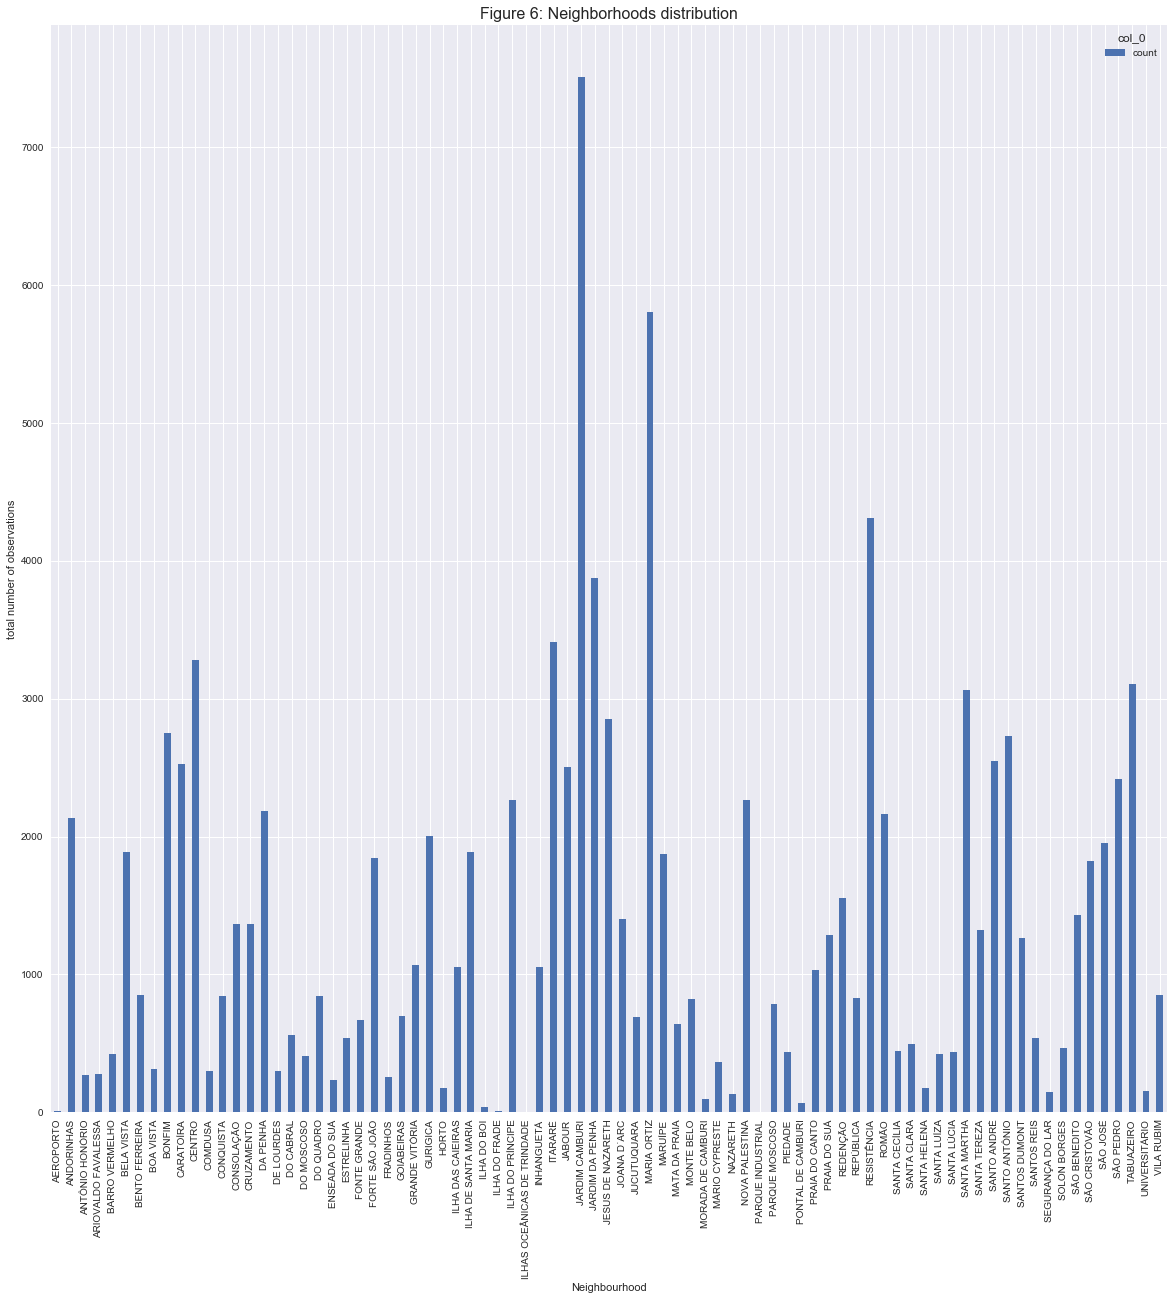

In [81]:
#Neighborhoods should be interesting as well
neighborhoods = pd.crosstab(index = nosho['Neighbourhood'], columns = 'count')
neighborhoods.plot(kind ='bar', figsize=(20,20))
plt.title('Figure 6: Neighborhoods distribution', fontsize = 16)
plt.ylabel('total number of observations')

The figure above shows the dsitribution of observations per neighborhood. The neighborhood of Jardim Camburi stands out the most. Without any background information on the neighborhood and the historical context when the survey was conducted, the author cannot draw any interesting conclusions. Other than that, the most number of people came from this area. However, as there is a wealth of information per neighborhood. It would be interesting to see
how the no-shows have been distribtuted across the city

In [83]:
# Let's see how no-shows are distributed across the city
nosho_hood = nosho.groupby('Neighbourhood')
nosho_hood.describe().head()

Age                                                  \
                      count       mean        std   min    25%   50%    75%   
Neighbourhood                                                                 
AEROPORTO               8.0  53.125000  10.934056  36.0  47.50  58.0  59.75   
ANDORINHAS           2136.0  35.813202  22.406783   0.0  17.00  35.0  52.00   
ANTÔNIO HONÓRIO       271.0  36.845018  23.606299   0.0  17.00  33.0  53.00   
ARIOVALDO FAVALESSA   280.0  32.939286  23.695346   0.0  12.75  29.0  52.00   
BARRO VERMELHO        422.0  45.109005  20.092481   0.0  30.00  48.5  60.00   

                           Alcoholism           ...  Scholarship          Yes  \
                       max      count      mean ...          75%  max   count   
Neighbourhood                                   ...                             
AEROPORTO             64.0        8.0  0.000000 ...          0.0  0.0     8.0   
ANDORINHAS           115.0     2136.0  0.022004 ...          0.0  1.0  2136.0   
ANTÔNIO HONÓRIO      100.0      271.0  0.000000 ...          0.0  1.0   271.0   
ARIOVALDO FAVALESSA   97.0      280.0  0.050000 ...          0.0  1.0   280.0   
BARRO VERMELHO        92.0      422.0  0.004739 ...          0.0  0.0   422.0   

                                                                  
                         mean       std  min  25%  50%  75%  max  
Neighbourhood                                                     
AEROPORTO            0.125000  0.353553  0.0  0.0  0.0  0.0  1.0  
ANDORINHAS           0.221910  0.415628  0.0  0.0  0.0  0.0  1.0  
ANTÔNIO HONÓRIO      0.184502  0.388611  0.0  0.0  0.0  0.0  1.0  
ARIOVALDO FAVALESSA  0.221429  0.415952  0.0  0.0  0.0  0.0  1.0  
BARRO VERMELHO       0.215640  0.411754  0.0  0.0  0.0  0.0  1.0  

[5 rows x 104 columns]

This clearly isn't going to work with the describe function on all the columns. 

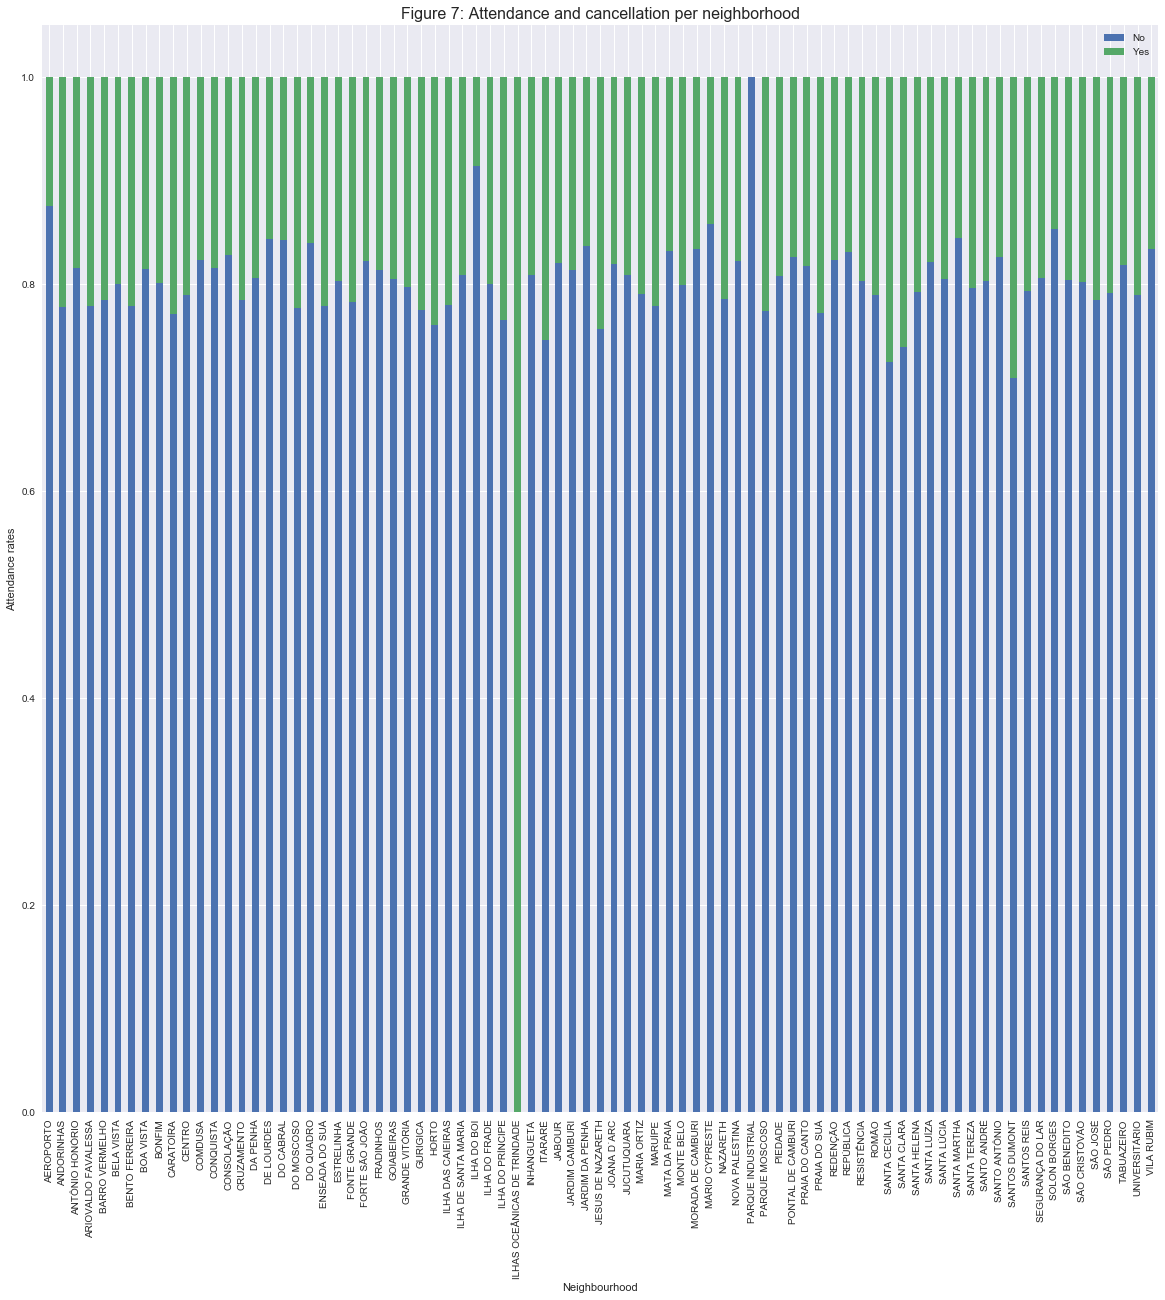

In [84]:
#Plot of neighborhood against the mean no-shows
nosho_hood['No','Yes'].mean().plot(kind = 'bar', figsize=(20,20), stacked = True)
plt.title('Figure 7: Attendance and cancellation per neighborhood', fontsize = 16)
plt.ylabel('Attendance rates')

The stacked bar graph above shows attendance rates across the city. According to this graph above, the neighborhoods look evenly distributed when it comes to attendance rates. Of course, there are two exceptions: Ilhas Oceanias has 0 attendance while Parque Idnustrial has full attendance. These are not errors. Both the neighborhoods only have one sample each. 

### Is there any relation between waiting time and attendance?
Perhaps the longer someone waits, the more likely the attendance is missed? This variable was created because it was, in fact, in the original version of the data (version 1: "Awaiting time") and for some reason removed in subsequent versions. However, it could be interesting: the hypothesis being that the longer the waiting time, the more frustrated the patient becomes or more likely they are to forget their appointment. 

In [86]:
# Duration between scheduled day and apointment day
nosho['Waiting_time'] = nosho['AppointmentDay'].sub(nosho['ScheduledDay'], axis=0)
nosho.Waiting_time.head(10)

0     2 days 13:03:19
1   -1 days +09:37:02
2   -1 days +14:47:31
3     2 days 16:46:24
4     6 days 16:40:03
5     2 days 12:01:42
6   -1 days +14:17:53
7    20 days 10:22:48
8    18 days 16:36:30
9    26 days 12:37:45
Name: Waiting_time, dtype: timedelta64[ns]

In [87]:
# Convert the datetime object to integer for easier manipulation
nosho.Waiting_time = nosho.Waiting_time.dt.days
nosho.Waiting_time.head(10)

0     2
1    -1
2    -1
3     2
4     6
5     2
6    -1
7    20
8    18
9    26
Name: Waiting_time, dtype: int64

count    109193.000000
mean          9.065746
std          15.200463
min          -7.000000
25%          -1.000000
50%           3.000000
75%          13.000000
max         178.000000
Name: Waiting_time, dtype: float64

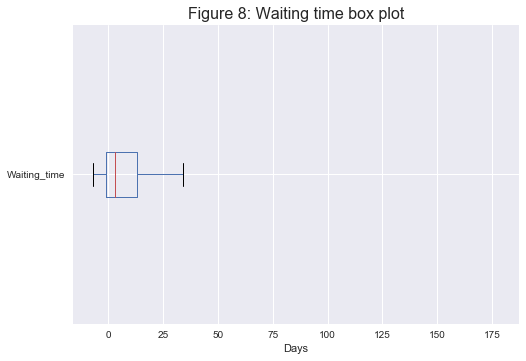

In [88]:
nosho.Waiting_time.describe()
nosho.boxplot('Waiting_time', vert = False)
plt.title('Figure 8: Waiting time box plot', fontsize = 16)
plt.xlabel('Days')

According to the figure above, most people only had to wait 9 days for an appointment which is actually very efficient. However, it shoudl be noted again that since th edata is skewed to the right, the sample size is much greater for the shorter duration. 

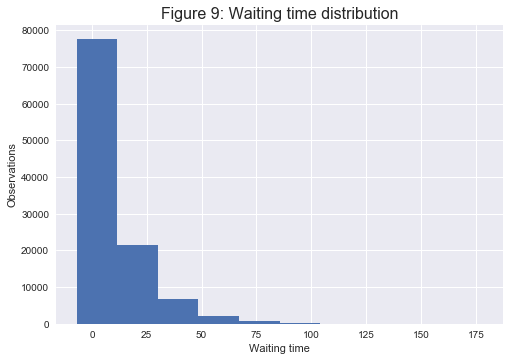

In [89]:
nosho.Waiting_time.hist()
plt.ylabel('Observations')
plt.xlabel('Waiting time')
plt.title('Figure 9: Waiting time distribution', fontsize = 16)

This is complementary to the boxplot figure above to show skewness. Again, it shows a right skewed distribution which we need to take into account before jumping to conclusions about impact of waiting time on attendance rates

In [92]:
nosho[['Waiting_time','Yes']].corr()

,Waiting_time,Yes
Waiting_time,1.000000,0.185291
Yes,0.185291,1.000000


The table above shows that there is no correlation between waiting time and attendance. And even if there were, it would be hard to drawn a conclusion because the distribution is not even.

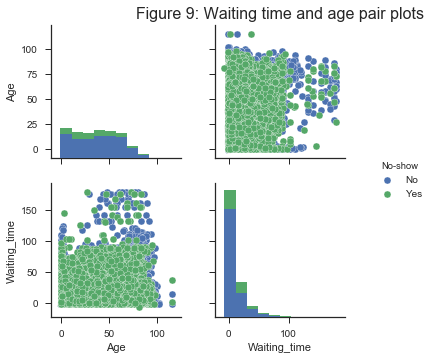

In [91]:
# does waiting time impact attendance? Even though the correlation table doesn't seem to point to anything conclusive

sns.set(style="ticks", color_codes=True)
sns.pairplot(nosho, vars=["Age", "Waiting_time"], hue='No-show')
plt.title('Figure 9: Waiting time and age pair plots', fontsize = 16)

The figure above shows that waiting time and age are not correlated to attendance rates. The stacked bar plots clearly show that the no attendance rates (in green) although higher in the bottom left, appear just as much across the distribution. It must be noted again that the high peak in the bottom left is due to the fact that the sample size for shorter durations are larger than larger durations. The only conclusion that can be drawn from this is that amongst the population, the majority of the sample waited around 9 days. But this conclusion cannot be generalised for the general population until context of the experiment is known. 

<a id='conclusions'></a>
## Conclusions

What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

Part 1: What factors are highly correlated to outcome?

Before drawing any conclusions, it is important to note that the data is very skewed and biased. There are 70% "shows" compared to "no-shows" (Figure 4). This may affect correlation between outcome and variables such as Age. If the data is skewed it invariably means that the mean and median will be off-centre and this will affect the Pearson coefficient. So correlation analysis will not hold up. this will also affect prediction analysis later on, although this can be accounted for in predictive algorithms and models. 

Some key variables are also skewed in the dataset: Age and outcome, for example.  This may explain why Age is not correlated? On the other hand it throws into doubt the method used for correlation. Perhaps another correlation method (such as Spearman) should be used for nominal and continuous variables? The author is aware that the CHI-sq tests and ANOVA are probably better test to use with categorical data however it is outside the scope of this project. 

More satisfying is the analysis done by grouping the ages (Figure 3). It is possible that younger ages (0-18 and 30-45) tend not to show up for their appointments. As the ages increase, the no-shows dissapear. However, it should also be noted that the sample size for older ages is much smaller than for 0-18 and 18-30. So there is a limitation here in drawing conclusions. 

Other variables have shown no correlation, and therefore further analysis nor figures have been produced. For example, there doesn't seem to be any suggestion that gender impacted attendance. 

The neighborhoods data, although interesintg has not thrown anything interesting. Looking at Figure 7, the distribution looks quite even across the beighborhoods. Nothing (apart from the two neighborhoods that have only one attendance and one cancellation) stand out. It is a pity that there is no socio-economic data within the neighborhoods. A future analysis could be neighborhoods and membership in the program. This may provide some light on the economic status of the neighborhoods. Howeve,r it will not shed any further light on whether a patient will show up for their appointment or not. 

Part 2: Is there any relationship between waiting time and attendance?

The simple answer is "no". From the analysis performed, there is no obvious relationship. the mean waiting time is actually 9 days which from the author's experience working within the healthcare industry is very efficient. however, both no-shows and shows have similar distributions over waiting time. this can be seen in the pairplots. 

## Final conclusions

The author believes that the wrong question was posed for this dataset. It should not (and possibly cannot due to its 70% bias) be used to predict attendance rates. More interesting variables may have helped: income and education status of patient, reason for appointment (you cannot assume from illness what the reason for the appointment is). Although, you could infer that, the more serious the illness and reason for appointment, the shorter the waiting time.

A more interesting question would have been "What neighborhood have the highest number of chronically ill patients?" or givne more socio-economic data per neighborhood, "What impact do income levels have with hospital attendance". These questions do not ask for a predictive model but can be nevertheless insightful in the way people use healthcare. 
